# Assignment 2 ML
   ### Maggie Ezzat Gamil Gaid 37-575 T-1
   ### Mariz Samir Mounir Awad 37-2632  T-2

**Question 1 - Perceptron Classifier:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Reading the training data:**

In [2]:
train_dir = "./Train/"

#train_data is X
train_data = np.zeros(shape=(1,785)).astype(int)

for i in range(1,2401):
    file_name = train_dir+ str(i)+".jpg"
    img = plt.imread(file_name)
    img = img.flatten()
    img = np.append(1, img)
    train_data = np.vstack((train_data, img))
    
#remove the first zero row in the matrix initizalization        
train_data = np.delete(train_data, (0), axis=0) 

train_data.shape

(2400, 785)

**1. Initialize the weight vectors for each classifier for each learning rate:**   
**2. Prepare the target vectors for each classifier:**

In [3]:
w_initial = np.zeros(shape=(785))
w_initial[0] = 1

weights = np.zeros(shape=(10,10,785))
for i in range(0,10):
    for j in range(0,10):
        weights[i][j] = w_initial
    
target_values = np.zeros(shape=(10,2400)).astype(int)

file_name = train_dir + "Training Labels.txt"
with open(file_name, 'r') as f:
    labels = f.readlines()
    
    for i in range(0, len(labels)):
        labels[i] = (int)(labels[i])
    
    labels = np.array(labels).astype(int)
    for i in range(0, 10):
        temp = np.array(labels).astype(int)
        temp[labels == i] = 1
        temp[labels !=i] = -1
        target_values[i] = temp


**Traning:**   
**For each learnig rate  train 10 classifiers:**

In [4]:
learning_rates = [1, 0.1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6, 10**-7, 10**-8, 10**-9]

for lr_index in range(len(learning_rates)):
    for class_index in range(0,10): #i is classifier
        for iter_index in range(0,500): # j is iteration
            
            for img_index in range(0,2400): #k is the point(image)
                
                learning_rate = learning_rates[lr_index]
                x = train_data[img_index]
                w = weights[lr_index][class_index]
                p = np.dot(w,x)
                p = 1 if p>=0 else -1
                t = target_values[class_index][img_index]
                if p!=t:
                    w = w + learning_rate*x*t
                    weights[lr_index][class_index] = w
    

**Reading the test data:**

In [5]:
test_dir = "./Test/"

test_data = np.zeros(shape=(785)).astype(int)

for i in range(1,201):
    file_name = test_dir+ str(i)+".jpg"
    img = plt.imread(file_name)
    img = img.flatten()
    img = np.append(1, img)
    test_data = np.vstack((test_data, img))
    
test_data = np.delete(test_data, (0), axis=0) 
test_data.shape

(200, 785)

**Read the true labels of the test set:**

In [17]:
true_labels = np.zeros(shape=(200))

file_name = test_dir + "Test Labels.txt"
with open(file_name, 'r') as f:
    labels = f.readlines()
    for i in range(0, len(labels)):
        labels[i] = (int)(labels[i])
    
    true_labels = np.array(labels).astype(int)


**Predict the labels of the test set using each of the trained weight vectors**

In [18]:
predicted_labels = np.zeros(shape=(10,200)).astype(int)

for lr_index in range(len(learning_rates)):
    for img_index in range(0,200): #i is the point(image)
        
        y = np.zeros(shape=(10))
        
        for class_index in range(0,10): #j is classifier
            
            x = test_data[img_index]
            w = weights[lr_index][class_index]
            p = np.dot(w,x)
            y[class_index] = p
            
        predicted_val = np.argmax(y)
        predicted_labels[lr_index][img_index] = predicted_val
            

**Function that plots the confusion Matrix:**

In [14]:
def plot_confusion_matrix(cm, target_names, img_name, title='Confusion matrix'):
    
    fig =  plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    fig.savefig(img_name+".jpg")

**Calculate the confusion matrix and the accuracies:**

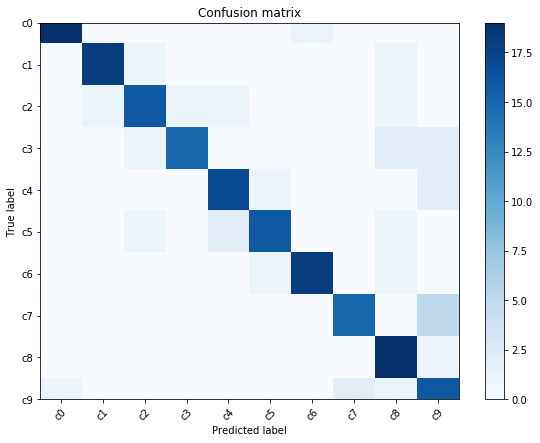

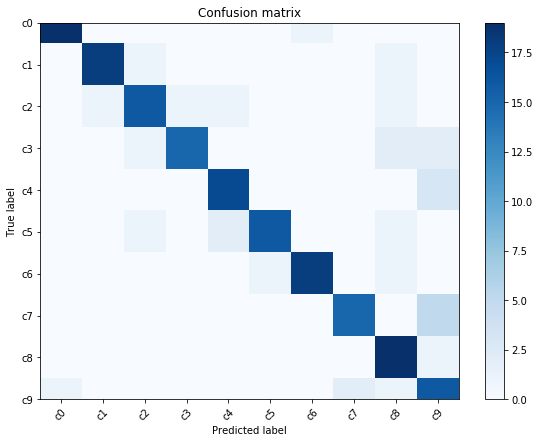

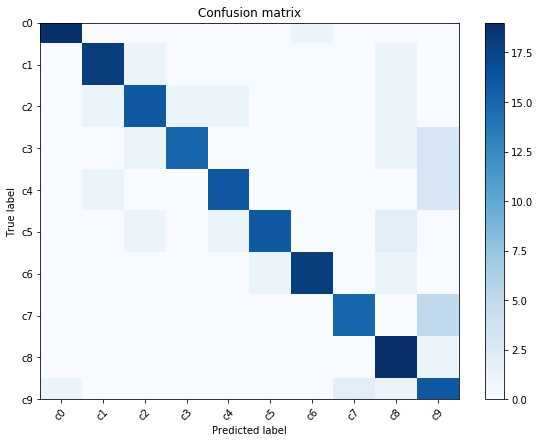

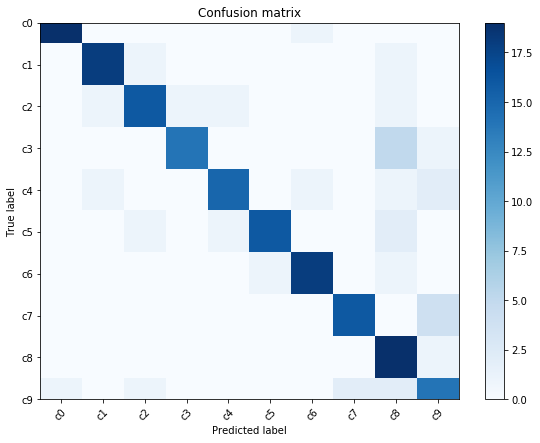

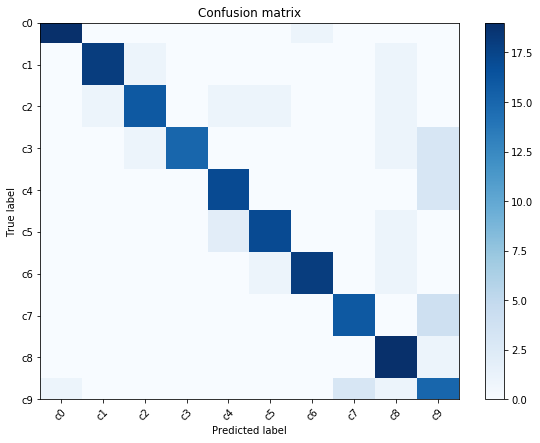

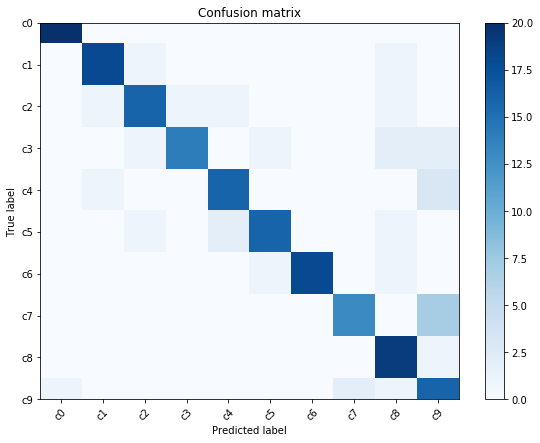

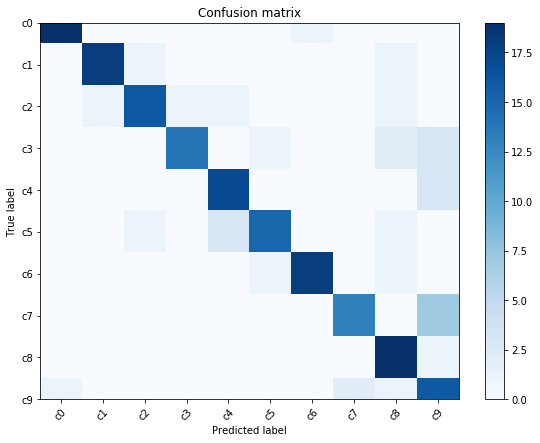

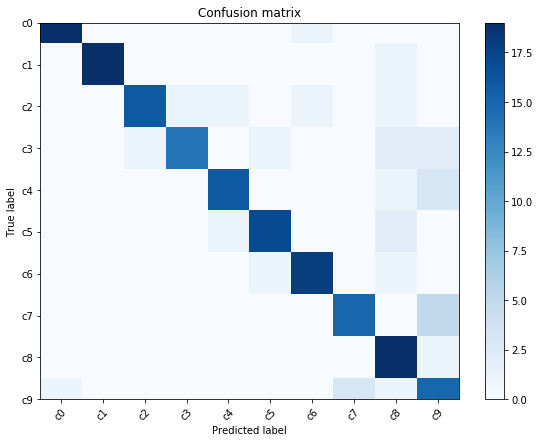

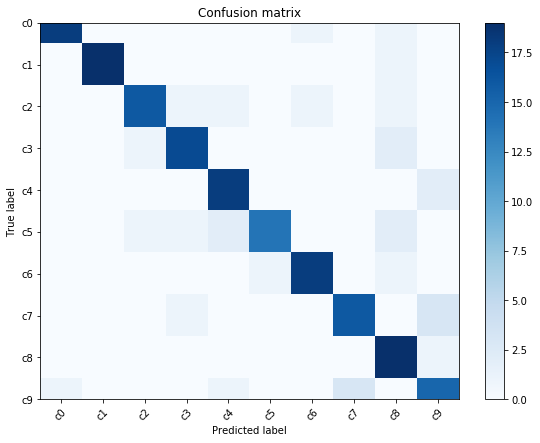

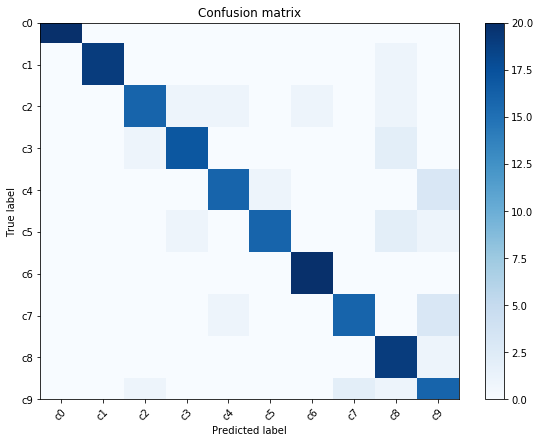

In [15]:
from sklearn.metrics import accuracy_score
accuracies = np.zeros(shape=(10))

for lr_index in range(len(learning_rates)):
    
    acc = accuracy_score(true_labels, predicted_labels[lr_index])
    accuracies[lr_index] = acc
    
    confusion = np.zeros((10, 10), dtype=int)

    
    for i in range(len(true_labels)):    
        confusion[true_labels[i]][predicted_labels[lr_index][i]]+=1
        
    img_name =  "Confusion-"+str(lr_index)
    plot_confusion_matrix(confusion, 
                       ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'] , 
                      img_name)



In [16]:
accuracies

array([0.845, 0.845, 0.84 , 0.825, 0.85 , 0.83 , 0.825, 0.84 , 0.85 ,
       0.875])